## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Aviation Accidents Data Cleaning

This notebook details the process of cleaning up a dataset containing information about aviation accidents. The steps include loading the data, handling missing values, correcting data types, removing duplicates, and other necessary cleaning operations.


## 1. Importing Libraries

We begin by importing the necessary libraries. `pandas` is used for data manipulation and analysis, while `numpy` is used for numerical operations.


In [508]:
# Importing necessary libraries

import pandas as pd
import numpy as np

## 2. Loading the Data

We load the aviation accidents dataset using `pandas.read_csv` from the specified file path. After loading the data, we display the first few rows to get an initial overview of the dataset.


In [509]:
# Loading the dataset from the specified file path
csv_path = ('data/Aviation_Data.csv')
df =  pd.read_csv(csv_path)

print (df.head())

         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country Latitude Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States      NaN       NaN          NaN   
1   BRIDGEPORT, CA  United States      NaN       NaN          NaN   
2    Saltville, VA  United States  36.9222  -81.8781          NaN   
3       EUREKA, CA  United States      NaN       NaN          NaN   
4       Canton, OH  United States      NaN       NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1          NaN  ...         

c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## 3. Statistical Summary of the Data

We will then use the `describe()` method to generate a statistical summary of the dataset. This provides key statistics such as count, mean, standard deviation, min, and max values for each numeric column.


In [510]:
# Displaying statistical summary of the dataset

print(df.describe)

<bound method NDFrame.describe of              Event.Id Investigation.Type Accident.Number  Event.Date  \
0      20001218X45444           Accident      SEA87LA080  1948-10-24   
1      20001218X45447           Accident      LAX94LA336  1962-07-19   
2      20061025X01555           Accident      NYC07LA005  1974-08-30   
3      20001218X45448           Accident      LAX96LA321  1977-06-19   
4      20041105X01764           Accident      CHI79FA064  1979-08-02   
...               ...                ...             ...         ...   
90343  20221227106491           Accident      ERA23LA093  2022-12-26   
90344  20221227106494           Accident      ERA23LA095  2022-12-26   
90345  20221227106497           Accident      WPR23LA075  2022-12-26   
90346  20221227106498           Accident      WPR23LA076  2022-12-26   
90347  20221230106513           Accident      ERA23LA097  2022-12-29   

              Location        Country Latitude Longitude Airport.Code  \
0      MOOSE CREEK, ID  Unit

## 4. Checking for Missing Values

We check for missing values in each column of the dataset using the `isnull().sum()` method. This step helps us identify columns with missing data, which is crucial for cleaning the dataset.


In [511]:
# Checking for missing values in each column of the dataset
print(df.isnull().sum())

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

## 5. Selecting Specific Columns

I decided to select specific columns that are relevant for my analysis. This step helps to focus on the most important aspects of the dataset. The selected columns are:
- `Event.Date`
- `Location`
- `Country`
- `Injury.Severity`
- `Aircraft.damage`
- `Aircraft.Category`
- `Make`
- `Total.Fatal.Injuries`
- `Total.Serious.Injuries`
- `Total.Minor.Injuries`
- `Total.Uninjured`
- `Weather.Condition`
- `Report.Status`

After selecting the columns, we create a new DataFrame and display the first few rows to confirm the selection.


In [512]:
# Selecting specific columns for analysis
list_columns = ['Event.Date', 'Location', 'Country', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Make', 'Total.Fatal.Injuries'
, 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Report.Status']

## 6 a). Creating a DataFrame with Selected Columns

We create a new DataFrame that contains only the selected columns from the original dataset. This helps to focus our analysis on the most relevant data.

##   b). DataFrame Information

Using the `info()` method, we display detailed information about the new DataFrame. This includes the number of non-null entries, data types of each column, and the memory usage. This step is crucial for understanding the structure and completeness of our data.


In [513]:
# Creating a new DataFrame with the selected columns
df = df[list_columns].copy()

In [514]:
# Displaying information about the new DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Date              88889 non-null  object 
 1   Location                88837 non-null  object 
 2   Country                 88663 non-null  object 
 3   Injury.Severity         87889 non-null  object 
 4   Aircraft.damage         85695 non-null  object 
 5   Aircraft.Category       32287 non-null  object 
 6   Make                    88826 non-null  object 
 7   Total.Fatal.Injuries    77488 non-null  float64
 8   Total.Serious.Injuries  76379 non-null  float64
 9   Total.Minor.Injuries    76956 non-null  float64
 10  Total.Uninjured         82977 non-null  float64
 11  Weather.Condition       84397 non-null  object 
 12  Report.Status           82508 non-null  object 
dtypes: float64(4), object(9)
memory usage: 9.0+ MB


In [515]:
#Data cleaning : here we remove rows with possible duplicate rows
df.drop_duplicates(inplace=True)

## 7. Convert 'Event.Date' column to datetime format
We convert the 'Event.Date' column to datetime format using `pd.to_datetime()`. This allows us to perform date-based operations and analysis on the aviation accidents dataset.

In [516]:
# Converting the 'Event.Date' column to datetime format

df['Event.Date'] = pd.to_datetime(df['Event.Date'])

In [517]:
# Checking for missing values in each column
df.isna().sum()

Event.Date                    1
Location                     53
Country                     226
Injury.Severity             998
Aircraft.damage            3181
Aircraft.Category         56446
Make                         64
Total.Fatal.Injuries      11380
Total.Serious.Injuries    12477
Total.Minor.Injuries      11899
Total.Uninjured            5896
Weather.Condition          4487
Report.Status              6375
dtype: int64

## 8. Drop rows with missing values in the 'Event.Date' column

We drop rows that have missing values in the 'Event.Date' column to ensure that our dataset only includes aviation accidents where the date of the event is known.


In [518]:
# Drop rows with missing values in the 'Event.Date' column
df.dropna(subset=['Event.Date'], inplace=True)

In [519]:
# Check for missing values specifically in the 'Event.Date' column
df['Event.Date'].isna().sum()

0

## 9. Defining Columns to Delete

We define a list `delete_columns` containing column names that we plan to delete from the DataFrame. These columns are:
- `Location`
- `Country`
- `Injury.Severity`
- `Make`

They are identified for deletion based on the specific requirements of the analysis or to simplify the dataset.



In [520]:
# Define a list of columns to delete from the dataframe
delete_columns = ['Location', 'Country', 'Injury.Severity', 'Make']

## 10. Dropping Rows with Missing Values in Critical Columns

We drop rows that have missing values in the specified critical columns. This step is important to ensure that our analysis is not affected by incomplete data in these key columns.


In [521]:
# Dropping rows where critical columns have missing values
df.dropna(subset = delete_columns, inplace = True)

In [522]:
# Checking for any remaining missing values in each column
df.isna().sum()

Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage            2645
Aircraft.Category         56042
Make                          0
Total.Fatal.Injuries      11348
Total.Serious.Injuries    12439
Total.Minor.Injuries      11859
Total.Uninjured            5865
Weather.Condition          3543
Report.Status              5448
dtype: int64

## 11. Calculating Mode for Injury Columns

We calculate the mode (the most frequent value) for several injury-related columns:
- `Total.Fatal.Injuries`
- `Total.Serious.Injuries`
- `Total.Minor.Injuries`
- `Total.Uninjured`

The mode helps us understand the most common number of injuries in each category.


In [523]:
# Calculating the mode for 'Total.Fatal.Injuries' column
mode_fatal = df['Total.Fatal.Injuries'].mode()

# Calculating the mode for 'Total.Serious.Injuries' column
mode_serious = df['Total.Serious.Injuries'].mode()

# Calculating the mode for 'Total.Minor.Injuries' column
mode_minor = df['Total.Minor.Injuries'].mode()

# Calculating the mode for 'Total.Uninjured' column
mode_uninjured = df['Total.Uninjured'].mode()

## 12. Filling Missing Values with Mode

We fill missing values in the injury-related columns with their respective modes. This approach ensures that the most common value in each column is used to replace missing data, which helps maintain the integrity of the dataset.
- `Total.Fatal.Injuries`
- `Total.Serious.Injuries`
- `Total.Minor.Injuries`
- `Total.Uninjured`


In [524]:
# Filling missing values in 'Total.Fatal.Injuries' with the mode
df['Total.Fatal.Injuries'].fillna(mode_fatal[0], inplace = True)

# Filling missing values in 'Total.Serious.Injuries' with the mode
df['Total.Serious.Injuries'].fillna(mode_serious[0], inplace = True)

# Filling missing values in 'Total.Minor.Injuries' with the mode
df['Total.Minor.Injuries'].fillna(mode_minor[0], inplace = True)

# Filling missing values in 'Total.Uninjured' with the mode
df['Total.Uninjured'].fillna(mode_uninjured[0], inplace = True)

## 13. Verifying Missing Values Handling

We use the `isna().sum()` method again to verify that all missing values in the dataset have been handled. This ensures that there are no remaining missing values in the critical columns.


In [525]:
# Checking for any remaining missing values in each column
df.isna().sum()

Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage            2645
Aircraft.Category         56042
Make                          0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          3543
Report.Status              5448
dtype: int64

## 14. Dropping Rows that are Missing 'Aircraft.damage' Values

We drop rows that have missing values in the `Aircraft.damage` column. This step ensures that our dataset does not contain incomplete information regarding aircraft damage, which is crucial for analysis.


In [526]:
# Dropping rows where 'Aircraft.damage' has missing values
df.dropna(subset = ['Aircraft.damage'], inplace = True)

In [527]:
# Checking for any remaining missing values in each column
df.isna().sum()

Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         54423
Make                          0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          2870
Report.Status              4866
dtype: int64

## 15. Analyzing 'Weather.Condition' Column

We use the `value_counts()` method to count the occurrences of each unique value in the `Weather.Condition` column. This helps us understand the distribution of different weather conditions in the dataset.


In [528]:
# Counting the occurrences of each unique value in 'Weather.Condition' column
df['Weather.Condition'].value_counts()

VMC    75184
IMC     5742
UNK      759
Unk      194
Name: Weather.Condition, dtype: int64

## 16. Filling Missing 'Weather.Condition' Values

We calculate the mode (the most frequent value) for the `Weather.Condition` column and fill any missing values with this mode. This ensures consistency and completeness in the weather condition data.


In [529]:
# Calculating the mode for 'Weather.Condition' column
mode_weather = df['Weather.Condition'].mode()

# Filling missing values in 'Weather.Condition' with the mode
df['Weather.Condition'].fillna(mode_weather[0], inplace = True)

In [530]:
# Checking for any remaining missing values in each column
df.isna().sum()

Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         54423
Make                          0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Report.Status              4866
dtype: int64

## 17. Analyzing 'Report.Status' Column

We use the `value_counts()` method to count the occurrences of each unique value in the `Report.Status` column. This helps us understand the distribution of different report statuses in the dataset.


In [531]:
# Counting the occurrences of each unique value in 'Report.Status' column
df['Report.Status'].value_counts()

Probable Cause                                                                                                                                                                                                59918
Foreign                                                                                                                                                                                                        1765
Factual                                                                                                                                                                                                         141
<br /><br />                                                                                                                                                                                                    121
The pilot's failure to maintain directional control during the landing roll.                                                                            

## 18. Filling Missing 'Report.Status' Values

We calculate the mode (the most frequent value) for the `Report.Status` column and fill any missing values with this mode. This ensures consistency and completeness in the report status data.


In [532]:
# Calculating the mode for 'Report.Status' column
mode_reportstatus = df['Report.Status'].mode()

# Filling missing values in 'Report.Status' with the mode
df['Report.Status'].fillna(mode_reportstatus[0], inplace = True)

In [533]:
# Checking for any remaining missing values in each column
df.isna().sum()

Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         54423
Make                          0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Report.Status                 0
dtype: int64

## 19. Filtering Rows by Aircraft Category

We filter the DataFrame to include only rows where the aircraft category is 'Airplane'. This step focuses our analysis specifically on aviation accidents involving airplanes.


In [534]:
# Filtering the DataFrame to include only rows where 'Aircraft.Category' is 'Airplane'
df = df[df['Aircraft.Category']== 'Airplane'].copy()

In [535]:
# Checking for any remaining missing values in each column
df.isna().sum()

Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Report.Status             0
dtype: int64

## 20. Analyzing 'Make' Column

We use the `value_counts()` method to count the occurrences of each unique value in the `Make` column. This helps us understand the distribution of different aircraft makes involved in airplane accidents.


In [536]:
# Counting the occurrences of each unique value in 'Make' column
df['Make'].value_counts()

CESSNA                    4724
Cessna                    3562
PIPER                     2756
Piper                     1891
BEECH                      990
                          ... 
CARPENTER                    1
GARRATT MANSFIELD W          1
PREISS VANS                  1
WINGTIP TO WINGTIP LLC       1
NORTH AMERICAN/SCHWAMM       1
Name: Make, Length: 3840, dtype: int64

## 21. Converting 'Make' Column to Lowercase

We convert all values in the `Make` column to lowercase using the `str.lower()` method. This standardizes the casing of values for consistency in further analysis.


In [537]:
# Converting values in 'Make' column to lowercase
df['Make'] = df['Make'].str.lower()

## 22. Updated Analysis of 'Make' Column

We use the `value_counts()` method again to count the occurrences of each unique value in the `Make` column, after converting all values to lowercase. This ensures consistency in the analysis by considering the standardized casing of values.


In [538]:
# Counting the occurrences of each unique value in 'Make' column after converting to lowercase
df['Make'].value_counts()

cessna                      8286
piper                       4647
beech                       1656
boeing                       556
mooney                       412
                            ... 
stevens r p/mccright d w       1
amd                            1
fox al                         1
eros                           1
kenetic aviation               1
Name: Make, Length: 3508, dtype: int64

## 23. Analyzing 'Weather.Condition' Column

We use the `value_counts()` method to count the occurrences of each unique value in the `Weather.Condition` column. This helps us understand the distribution of different weather conditions in the dataset specifically for airplane accidents.


In [539]:
# Counting the occurrences of each unique value in 'Weather.Condition' column
df['Weather.Condition'].value_counts()

VMC    24283
IMC     1332
Unk      158
UNK      132
Name: Weather.Condition, dtype: int64

## 24. Converting 'Weather.Condition' Column to Uppercase

We convert all values in the `Weather.Condition` column to uppercase using the `str.upper()` method. This standardizes the casing of values for consistency in further analysis and comparisons.


In [540]:
# Converting values in 'Weather.Condition' column to uppercase
df['Weather.Condition'] = df['Weather.Condition'].str.upper()

## 25. Updated Analysis of 'Weather.Condition' Column

We use the `value_counts()` method again to count the occurrences of each unique value in the `Weather.Condition` column, after converting all values to uppercase. This ensures consistency in the analysis by considering the standardized casing of values.


In [541]:
# Counting the occurrences of each unique value in 'Weather.Condition' column after converting to uppercase
df['Weather.Condition'].value_counts()

VMC    24283
IMC     1332
UNK      290
Name: Weather.Condition, dtype: int64

## 26. Resetting DataFrame Index

We reset the index of the DataFrame using the `reset_index()` method with `drop=True` parameter. This reindexes the DataFrame sequentially starting from 0, dropping the old index.


In [542]:
# Resetting the index of the DataFrame after filtering
df.reset_index(inplace = True, drop = True)

## 27. Saving Cleaned DataFrame to CSV

We save the cleaned DataFrame to a CSV file named `Cleaned_Aviation_Data.csv` located at `C:\Docs\Flatirons\`. The `index=False` parameter ensures that the index of the DataFrame is not included in the saved file.


In [543]:
# Saving the cleaned DataFrame to a CSV file
df.to_csv('C:\Docs\Flatirons\Cleaned_Aviation_Data.csv', index = False)

## 28. Importing Data Visualization Libraries

We import `matplotlib.pyplot` for creating static, animated, and interactive visualizations in Python, and `seaborn` for making statistical graphics in Python. These libraries will be used for visualizing insights from the cleaned aviation accidents dataset.


In [544]:
import matplotlib.pyplot as plt
import seaborn as sns

## 29. Plotting Relevant Visualizations

## Accident Trends Over Time

We use a line plot to visualize the trends of aviation accidents over time based on the dataset. The x-axis represents the 'Event.Date' column, which has been converted to datetime format for accurate time series analysis. The y-axis shows the number of accidents, reflecting the index of the DataFrame.

### Insights:
- **Date**: The timeline spans from the earliest to the latest dates recorded in the dataset.
- **Number of Accidents**: The y-axis quantifies the frequency of accidents over the specified period.
- **Trend Analysis**: Observing the trend can provide insights into any patterns or fluctuations in accident occurrences over time.

This visualization helps stakeholders to understand historical trends in aviation accidents, supporting informed decision-making and risk assessment strategies.


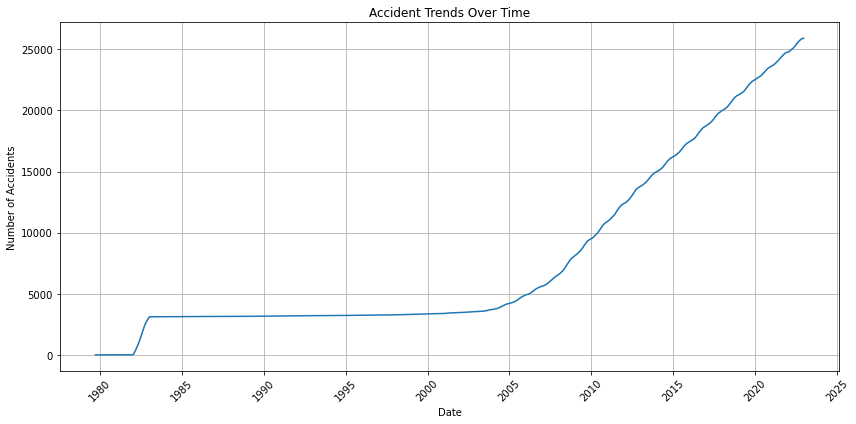

In [545]:
# Plotting accident trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Event.Date', y=df.index, data=df)
plt.title('Accident Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(True)67
plt.tight_layout()
plt.show()

## Distribution of Aircraft Damage

We visualize the distribution of different types of aircraft damage encountered in the dataset using a count plot. Each bar represents a category of damage (minor, substantial, destroyed, etc.), and the height of the bar indicates the frequency of accidents associated with that type of damage.

### Insights:
- **Aircraft Damage Categories**: The x-axis displays categories such as minor, substantial, destroyed, etc., detailing the severity levels of damage.
- **Frequency**: The y-axis represents the count of accidents categorized under each type of damage.
- **Analysis**: This plot helps in understanding the prevalence of various damage types across aviation accidents recorded in the dataset.

This visualization aids in assessing the severity and extent of damage suffered by aircraft involved in accidents, informing decisions related to risk mitigation and aircraft maintenance strategies.


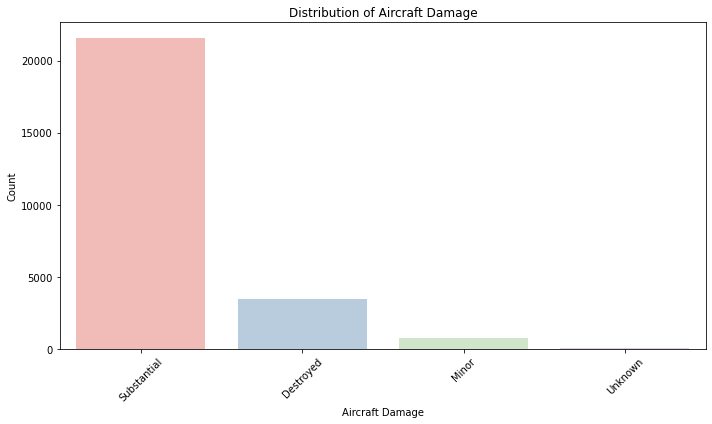

In [546]:
# Distribution of Aircraft Damage
plt.figure(figsize=(10, 6))
sns.countplot(x='Aircraft.damage', data=df, palette='Pastel1')
plt.title('Distribution of Aircraft Damage')
plt.xlabel('Aircraft Damage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 864x576 with 0 Axes>

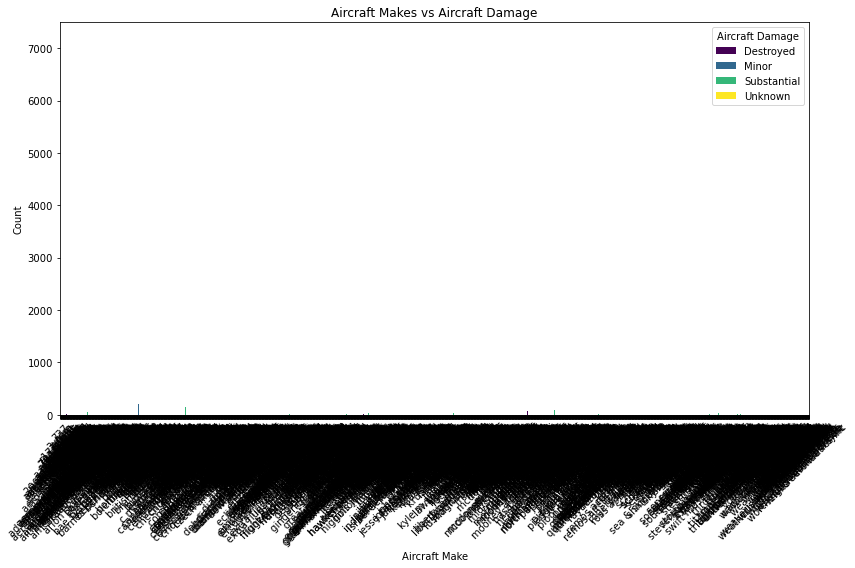

In [547]:
# Grouping by 'Make' and 'Aircraft.damage' and counting occurrences
make_damage_counts = df.groupby(['Make', 'Aircraft.damage']).size().unstack()

# Plotting bar graph
plt.figure(figsize=(12, 8))
make_damage_counts.plot(kind='bar', width=0.8, figsize=(12,8), colormap='viridis')
plt.title('Aircraft Makes vs Aircraft Damage')
plt.xlabel('Aircraft Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Aircraft Damage', loc='upper right')
plt.tight_layout()
plt.show()
